In [30]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import ast
import collections

## 1: Import sessions

In [12]:
# import logs and sessions
logs_df = pd.read_csv("data/clean_logs.csv")
ark_df = pd.read_csv("data/ark_df.csv")
non_empty_arks_df = pd.read_csv("arks_final/arks_non_empty.csv")
sessions_df = pd.read_csv("data/enriched_sessions.csv")

In [24]:
# import rabbit holes sessions
sessions_rh_df = pd.read_csv("data/sessions_rh.csv")

## 2: Statistics on the logs

In [13]:
print("Number of logs:", len(logs_df))
print("Number of unique arks:", len(ark_df))
print("Number of arks for which we have data:", len(non_empty_arks_df))

Number of logs: 10042040
Number of unique arks: 477992
Number of arks for which we have data: 459821


In [17]:
#period
print(logs_df.iloc[0]['Full_request'])
print(logs_df.iloc[-1]['Full_request'])

- - [31/Jan/2016:18:59:19 +0100] "GET /ark:/12148/bpt6k70211m HTTP/1.0" 200 24552 "-" "-" 48652
- - [02/Feb/2016:05:30:25 +0100] "GET /ark:/12148/bpt6k70211m HTTP/1.0" 200 24552 "-" "-" 74214


In [18]:
print("Our logs range from the 31st of January 2016 at 18:59 to the 2nd of February at 5:30")

Our logs range from the 31st of January 2016 at 18:59 to the 2nd of February at 5:30


In [14]:
print("We are missing about", len(non_empty_arks_df)/len(ark_df)*100, "% of the arks.")

We are missing about 3.8015280590470155 % of the arks.


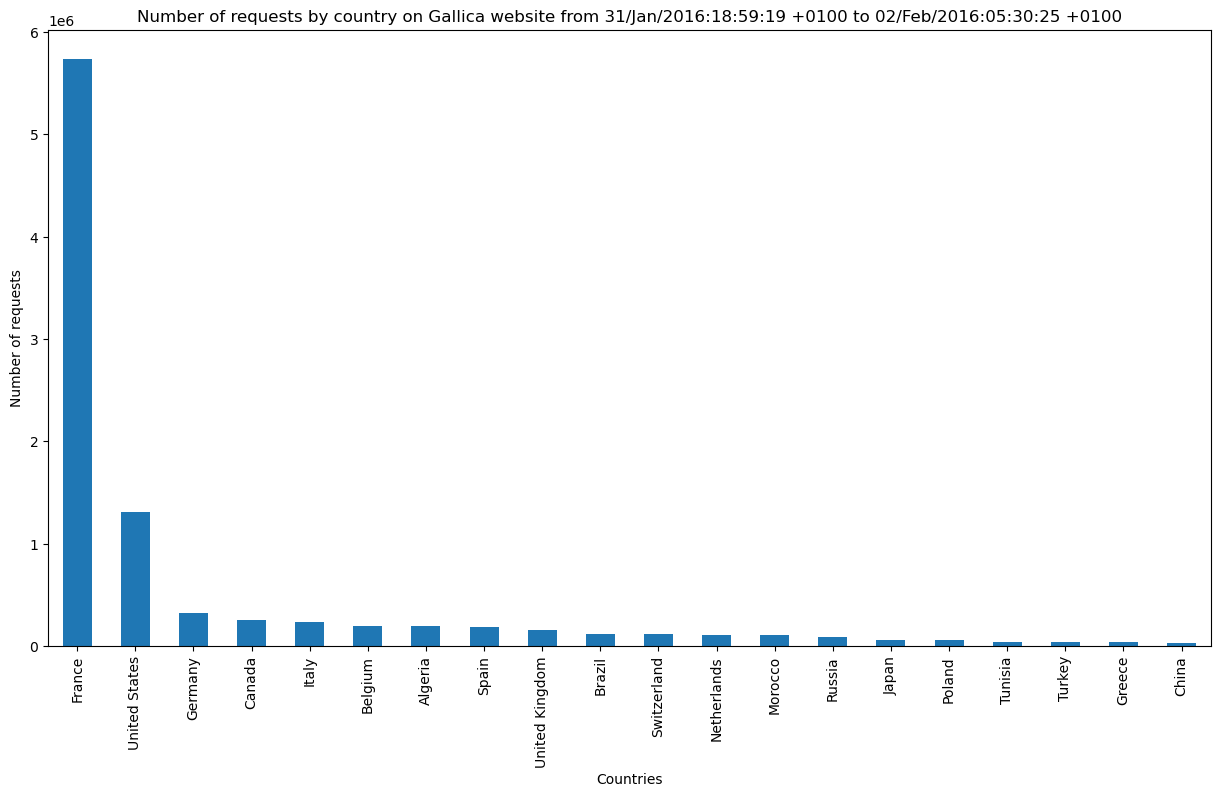

In [26]:
countries_count[:20].plot(kind='bar',figsize = (15,8));
plt.xlabel('Countries')
plt.ylabel('Number of requests')
plt.title('Number of requests by country on Gallica website from 31/Jan/2016:18:59:19 +0100 to 02/Feb/2016:05:30:25 +0100');

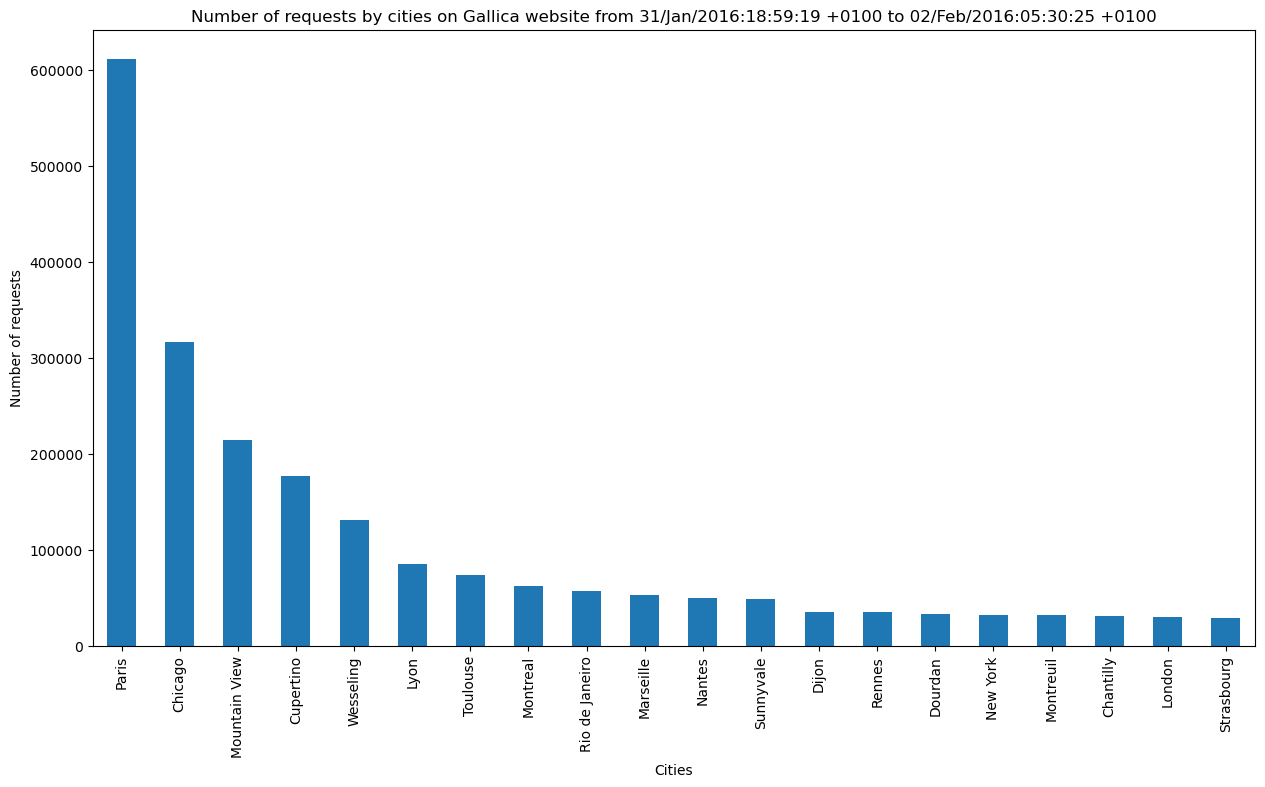

In [27]:
cities_count[:20].plot(kind='bar',figsize = (15,8));
plt.xlabel('Cities')
plt.ylabel('Number of requests')
plt.title('Number of requests by cities on Gallica website from 31/Jan/2016:18:59:19 +0100 to 02/Feb/2016:05:30:25 +0100');


In [15]:
def calculate_percentage(df, column, value):
    """
    Calculate the percentage of a specific value in a column of a DataFrame.

    Args:
    - df: DataFrame
    - column: Column name
    - value: Value to calculate the percentage for

    Returns:
    - Percentage of the value in the column
    """
    # Count occurrences of the value in the column
    count_value = df[column].value_counts().get(value, 0)
    
    # If the value is NaN, count NaN values directly
    if pd.isna(value):
        count_value = df[column].isna().sum()
    
    # Calculate percentage
    percentage = count_value / len(df) * 100
    
    return percentage

In [16]:
# Percentage of unknown referrers
percentage_unknown_referrer = calculate_percentage(logs_df, 'Referrer', '-')
print("Percentage of unknown referrers: ", percentage_unknown_referrer)

Percentage of unknown referrers:  16.054745848453102


In [19]:
# Percentage of unknown countries
percentage_unknown_countries = calculate_percentage(logs_df, 'Country', float('nan'))
print("Percentage of unknown countries: ", percentage_unknown_countries)

Percentage of unknown countries:  1.1899375027384873


In [20]:
# same for cities
percentage_unknown_cities = calculate_percentage(logs_df, 'City', float('nan'))
print("Percentage of unknown cities : ", percentage_unknown_cities)

Percentage of unknown cities :  24.104614201895235


In [21]:
# some stats
# nb of countries
countries_count = logs_df['Country'].value_counts()
countries_count = countries_count.dropna()
print("There are", len(countries_count), "different countries represented")
# nb of cities
cities_count = logs_df['City'].value_counts()
cities_count = cities_count.dropna()
print("There are", len(cities_count), "different cities represented")

There are 166 different countries represented
There are 8510 different cities represented


In [25]:
# Convert string representations to actual lists
logs_df['search_terms'] = logs_df['search_terms'].apply(ast.literal_eval)

# Count occurrences of empty lists in the 'search_terms' column
nb_non_search = (logs_df['search_terms'].apply(lambda x: len(x) == 0)).sum()
# get percentage of non-search request in all logs
percentage_non_search = nb_non_search/len(logs_df) * 100
print("Percentage of non-search requests : ", percentage_non_search)

Percentage of non-search requests :  98.3055534532824


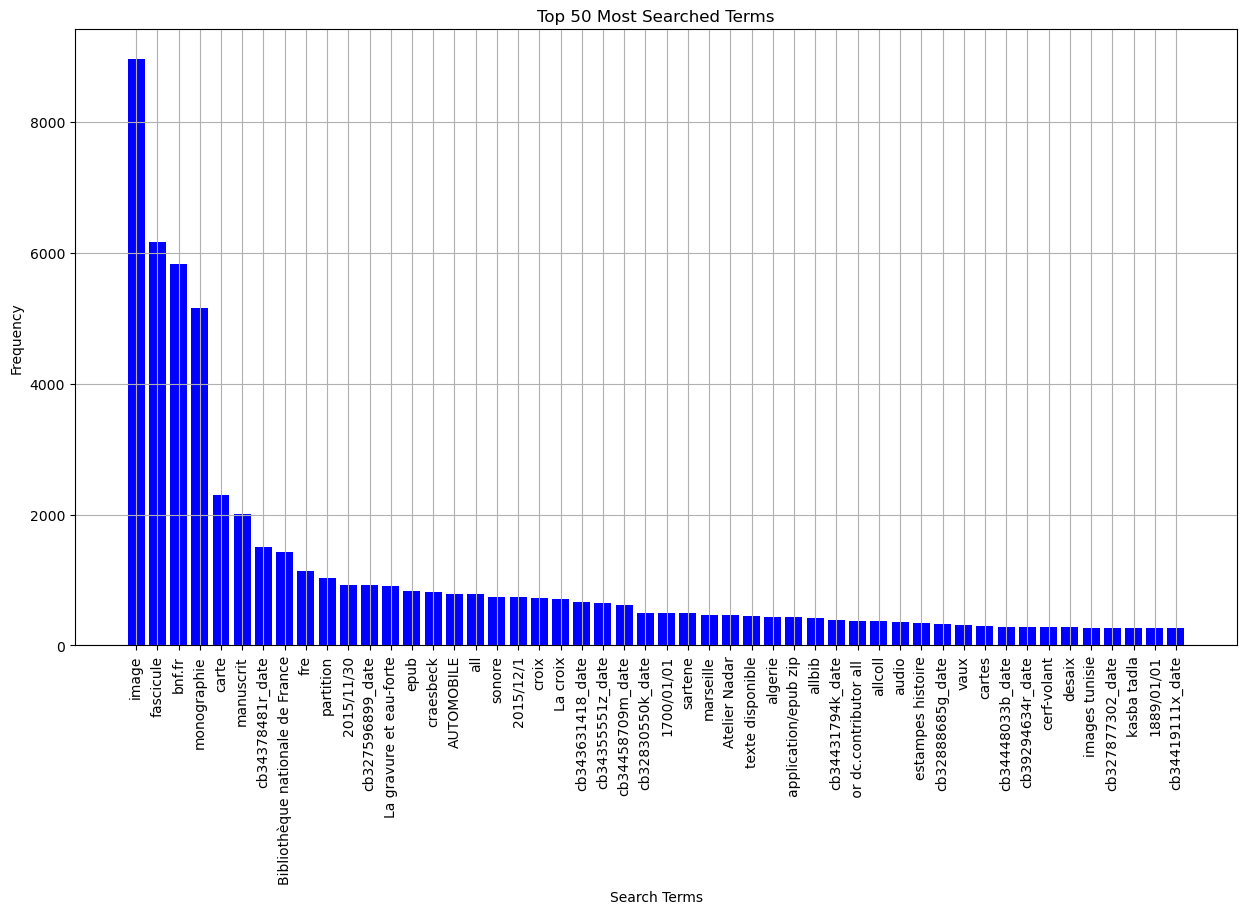

In [31]:
search_terms_col = logs_df['search_terms']
flat_search_terms = [term for sublist in search_terms_col for term in sublist]
term_counts = collections.Counter(flat_search_terms)
top_50_terms = term_counts.most_common(50)

# Separate the terms and their counts for plotting
terms, counts = zip(*top_50_terms)

# Step 4: Visualize the results using a bar chart
plt.figure(figsize=(15, 8))
plt.bar(terms, counts, color='blue')
plt.xlabel('Search Terms')
plt.ylabel('Frequency')
plt.title('Top 50 Most Searched Terms')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


## 4: Statistics on the sessions (RH and non RH)

In [39]:
sessions_df.columns

Index(['session_id', 'Ark', 'Date', 'Country', 'City', 'search_terms', 'Theme',
       'Type', 'visibility', 'length_minutes', 'very_long', 'nb_docs',
       '>=10_docs', 'top_10%_length', 'top_5%_length', 'diversified',
       'diversified_restrictive', 'diversified_restrictive_5',
       'diversified_5'],
      dtype='object')

In [40]:
logs_df.columns

Index(['Unnamed: 0', '0', 'IPaddress', 'Country', 'City', 'Full_request',
       'Date', 'Request', 'Referrer', 'Ark', 'search_terms', 'visibility'],
      dtype='object')

In [ ]:
# add visibility metric
sessions_df.loc[:, 'average_visibility'] = sessions_df['visibility'].apply(lambda x: sum(x) / len(x) if x else 0)
sessions_df.loc[:, 'min_visibility'] = sessions_df['visibility'].apply(lambda x: min(x) if x else 0)

sessions_rh_df.loc[:, 'average_visibility'] = sessions_rh_df['visibility'].apply(lambda x: sum(x) / len(x) if x else 0)
sessions_rh_df.loc[:, 'min_visibility'] = sessions_rh_df['visibility'].apply(lambda x: min(x) if x else 0)

In [ ]:
avg_vis = sessions['average_visibility'].value_counts().sort_index()

plt.figure(figsize=(15, 8))

plt.plot(avg_vis.index, avg_vis.values, marker='o', linestyle='-', color='red', label='Number of Sessions')

plt.xlabel('Average Visibility of Sessions')
plt.ylabel('Number of Sessions')
plt.title('Distribution of Session Average Visibility Over All Sessions')
plt.grid(True)
plt.yscale('log')  # Set log scale for y-axis
plt.legend()
plt.show()

In [ ]:
avg_vis = sessions['min_visibility'].value_counts().sort_index()

plt.figure(figsize=(15, 8))

plt.plot(avg_vis.index, avg_vis.values, marker='o', linestyle='-', color='red', label='Number of Sessions')

plt.xlabel('Min Visibility of Sessions')
plt.ylabel('Number of Sessions')
plt.title('Distribution of Session Min Visibility Over All Sessions')
plt.grid(True)
plt.yscale('log')  # Set log scale for y-axis
plt.legend()
plt.show()


In [ ]:

avg_vis = sessions_rh['average_visibility'].value_counts().sort_index()

plt.figure(figsize=(15, 8))

plt.plot(avg_vis.index, avg_vis.values, marker='o', linestyle='-', color='red', label='viz of RH sessions')


plt.xlabel('avg viz of RH sessions')
plt.ylabel('Number of Sessions')
plt.title('Distribution of RH Session avg viz')
plt.grid(True)
plt.yscale('log')  # Set log scale for y-axis
plt.legend()
plt.show()

In [ ]:
avg_vis = sessions_rh['min_visibility'].value_counts().sort_index()

plt.figure(figsize=(15, 8))

plt.plot(avg_vis.index, avg_vis.values, marker='o', linestyle='-', color='red', label='Number of Sessions')

plt.xlabel('Min Visibility of RH Sessions')
plt.ylabel('Number of Sessions')
plt.title('Distribution of Session Min Visibility Over All Sessions')
plt.grid(True)
plt.yscale('log')  # Set log scale for y-axis
plt.legend()
plt.show()


In [ ]:
# add time threshold

In [ ]:
top_10_threshold = sessions_df['length_minutes'].quantile(0.9)
print("10% of the sessions are longer than :", top_10_threshold)
top_5_threshold = sessions_df['length_minutes'].quantile(0.95)
print("5% of the sessions are longer than :", top_5_threshold)

In [ ]:
# Separate sessions into top 10% and not in top 10%
top_5_sessions = sessions[sessions['top_5%_length']]
other_sessions = sessions[~sessions['top_5%_length']]

# Calculate session lengths count for top 10% and other sessions
top_5_length_count = top_5_sessions['length_minutes'].value_counts().sort_index()
other_length_count = other_sessions['length_minutes'].value_counts().sort_index()

# Plotting the distribution of session lengths using a line plot
plt.figure(figsize=(15, 8))

# Plot top 10% sessions
plt.plot(top_5_length_count.index, top_5_length_count.values, marker='o', linestyle='-', color='red', label='Top 10% Length Sessions')

# Plot other sessions
plt.plot(other_length_count.index, other_length_count.values, marker='o', linestyle='-', color='blue', label='Other Sessions')

plt.xlabel('Length of Session (minutes)')
plt.ylabel('Number of Sessions')
plt.title('Distribution of Session Lengths')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# same stats but on RH
# Calculate session lengths count for top 10% and other sessions
rh_length_count = sessions_rh['length_minutes'].value_counts().sort_index()

# Plotting the distribution of session lengths using a line plot
plt.figure(figsize=(15, 8))

# Plot sessions
plt.plot(rh_length_count.index, rh_length_count.values, marker='o', linestyle='-', color='red', label='RH Sessions')

plt.xlabel('Length of Session (minutes)')
plt.ylabel('Number of Sessions')
plt.title('Distribution of RH Session Lengths')
plt.grid(True)
plt.legend()
plt.show()



In [ ]:
logs_arks_df['Type'].unique()